### –ö—É—Ä—Å–æ–≤–æ–π –ø—Ä–æ–µ–∫—Ç.

#### Classification. Choose tutors

–í–∞—à–∞ –∑–∞–¥–∞—á–∞ —ç—Ç–æ–º —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏ - –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, –ø–æ–¥–æ–π–¥–µ—Ç –ª–∏ —Ä–µ–ø–µ—Ç–∏—Ç–æ—Ä –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –∫ —ç–∫–∑–∞–º–µ–Ω—É –ø–æ –º–∞—Ç–µ–º–∞—Ç–∏–∫–µ. –í–∞–º –±—É–¥—É—Ç –¥–∞–Ω—ã –¥–≤–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞: train.csv (—Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é) –∏ test.csv (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ

In [2]:
s_submission = pd.read_csv('sample_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### EDA

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [3]:
train_df

Id   age  years_of_experience  lesson_price  qualification  physics  \
0        0  35.0                  0.0        2150.0            2.0      0.0   
1        1  52.0                  2.0        1250.0            2.0      1.0   
2        2  29.0                  3.0        1750.0            1.0      1.0   
3        3  33.0                  3.0        1050.0            1.0      0.0   
4        4  46.0                  3.0        2250.0            2.0      1.0   
...    ...   ...                  ...           ...            ...      ...   
9995  9995  55.0                  2.0        2150.0            2.0      1.0   
9996  9996  53.0                  2.0        1350.0            1.0      0.0   
9997  9997  44.0                  5.0        1750.0            1.0      0.0   
9998  9998  41.0                  0.0        1700.0            2.0      1.0   
9999  9999  41.0                  5.0        1200.0            1.0      0.0   

      chemistry  biology  english  geography  history  mean_exam_points  \
0           0.0      0.0      0.0        0.0      0.0              74.0   
1           0.0      1.0      0.0        0.0      1.0              57.0   
2           0.0      0.0      0.0        0.0      0.0              66.0   
3           0.0      0.0      0.0        0.0      0.0              66.0   
4           0.0      0.0      0.0        0.0      0.0              73.0   
...         ...      ...      ...        ...      ...               ...   
9995        0.0      0.0      0.0        0.0      0.0              79.0   
9996        0.0      0.0      0.0        0.0      0.0              59.0   
9997        0.0      0.0      0.0        0.0      1.0              59.0   
9998        0.0      0.0      0.0        0.0      0.0              72.0   
9999        0.0      0.0      0.0        0.0      0.0              40.0   

      choose  
0          0  
1          1  
2          0  
3          1  
4          0  
...      ...  
9995       0  
9996       0  
9997       0  
9998       0  
9999       0  

[10000 rows x 13 columns]

In [4]:
test_df

Id   age  years_of_experience  lesson_price  qualification  physics  \
0     10000  32.0                  2.0        2700.0            3.0      0.0   
1     10001  35.0                  6.0        1800.0            2.0      1.0   
2     10002  44.0                  2.0        1200.0            1.0      0.0   
3     10003  44.0                  4.0        2950.0            3.0      1.0   
4     10004  38.0                  3.0        1400.0            2.0      1.0   
...     ...   ...                  ...           ...            ...      ...   
9995  19995  44.0                  3.0        1850.0            2.0      1.0   
9996  19996  45.0                  3.0        2450.0            2.0      1.0   
9997  19997  44.0                  2.0        1250.0            1.0      1.0   
9998  19998  51.0                  5.0        1000.0            2.0      1.0   
9999  19999  43.0                  0.0        1500.0            1.0      1.0   

      chemistry  biology  english  geography  history  mean_exam_points  
0           0.0      0.0      0.0        0.0      0.0              90.0  
1           1.0      0.0      0.0        0.0      0.0              71.0  
2           0.0      0.0      0.0        0.0      0.0              45.0  
3           0.0      0.0      0.0        0.0      0.0              92.0  
4           0.0      0.0      0.0        0.0      0.0              58.0  
...         ...      ...      ...        ...      ...               ...  
9995        1.0      0.0      0.0        0.0      0.0              68.0  
9996        1.0      0.0      1.0        0.0      0.0              72.0  
9997        1.0      0.0      0.0        0.0      0.0              63.0  
9998        0.0      1.0      0.0        0.0      0.0              64.0  
9999        1.0      1.0      0.0        0.0      0.0              41.0  

[10000 rows x 12 columns]

Id - –∞–π–¥–∏\
age - –≤–æ–∑—Ä–∞—Å—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è\
years_of_experience - —Å—Ç–∞–∂ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è\
lesson_price - —Å—Ç–æ–∏–º–æ—Å—Ç—å —É—Ä–æ–∫–∞\
qualification - –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è\
physics - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ —Ñ–∏–∑–∏–∫—É\
chemistry - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ —Ö–∏–º–∏—é\
biology - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ –±–∏–æ–ª–æ–≥–∏—é\
english - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ –∞–Ω–≥–ª–∏–π—Å–∫–∏–π\
geography - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ –≥–µ–æ–≥—Ä–∞—Ñ–∏—é\
history - –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –ª–∏ –∏—Å—Ç–æ—Ä–∏—é\
mean_exam_points - —Å—Ä–µ–¥–Ω–∏–π –±–∞–ª–ª –∑–∞ —ç–∫–∑–∞–º–µ–Ω —É—á–µ–Ω–∏–∫–æ–≤\
choose - —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏, –≤—ã–±–∏—Ä–∞—Ç—å –∏–ª–∏ –Ω–µ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –æ–ø–∏—Å–∞–Ω–∏—è, –¥–∞–Ω–Ω—ã—Ö –æ–± –æ–±—É—á–µ–Ω–∏–∏ –º–∞—Ç–µ–º–∞—Ç–∏–∫–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç. –ù–æ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–æ–∂–∏—Ç—å, —á—Ç–æ —É—á–∏—Ç–µ–ª—å –ø—Ä–µ–ø–æ–¥–∞—é—â–∏–π —Ñ–∏–∑–∏–∫—É, —Ç–∞–∫ –∂–µ –ø—Ä–µ–ø–æ–¥–∞–µ—Ç –∏ –º–∞—Ç–µ–º–∞—Ç–∏–∫—É, –∞ –±–∏–æ–ª–æ–≥–∏—è –∏–¥–µ—Ç –≤ –ø–∞—Ä–µ —Å —Ö–∏–º–∏–µ–π, –Ω—É –∏ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–µ –Ω–∞—É–∫–∏ –æ—Ç–¥–µ–ª—å–Ω–æ. –ü–æ—ç—Ç–æ–º—É, –º–æ–∂–Ω–æ, –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –∏–∑–±–∞–≤–∏—Ç—Å—è –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –Ω–∞–ø—Ä–∏–º–µ—Ä –∏—Å—Ç–æ—Ä–∏–∏, –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏, –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ, –±–∏–æ–ª–æ–≥–∏–∏ –∏ —Ö–∏–º–∏–∏. –ù–æ –¥–µ–ª–∞—Ç—å –º—ã —ç—Ç–æ–≥–æ –Ω–µ –±—É–¥–µ–º, –ø–æ–ø—Ä–æ–±—É–µ–º –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –ø—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏–µ–º —Ñ–∏–∑–∏–∫–∏.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [7]:
print('–°—Ç—Ä–æ–∫ –≤ —Ç—Ä–µ–π–Ω–µ:', train_df.shape[0])
print('–°—Ç—Ä–æ–∫ –≤ —Ç–µ—Å—Ç–µ', test_df.shape[0])

–°—Ç—Ä–æ–∫ –≤ —Ç—Ä–µ–π–Ω–µ: 10000
–°—Ç—Ä–æ–∫ –≤ —Ç–µ—Å—Ç–µ 10000


–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤ train_df

In [8]:
train_df.shape[1] - 1 == test_df.shape[1]

True

–£–º–µ–Ω—å—à–∏–º —Ä–∞–∑–º–µ—Ä –∑–∞–Ω—è—Ç–æ–π –¥–∞—Ç–∞—Å–µ—Ç–æ–º –ø–∞–º—è—Ç–∏:

In [9]:
def reduce_mem_usage(train_df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = train_df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train_df.columns:
        col_type = train_df[col].dtype
        
        if col_type != object:
            c_min = train_df[col].min()
            c_max = train_df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_df[col] = train_df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_df[col] = train_df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_df[col] = train_df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_df[col] = train_df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_df[col] = train_df[col].astype(np.float32)
                else:
                    train_df[col] = train_df[col].astype(np.float64)
        else:
            train_df[col] = train_df[col].astype('category')

    end_mem = train_df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return train_df

In [10]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 0.99 MB
Memory usage after optimization is: 0.45 MB
Decreased by 54.8%


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ:

In [11]:
train_df.describe()

Id           age  years_of_experience  lesson_price  \
count  10000.00000  10000.000000         10000.000000  10000.000000   
mean    4999.50000     45.800900             1.974800   1702.439941   
std     2886.89568      8.030274             1.766883    523.789062   
min        0.00000     23.000000             0.000000    200.000000   
25%     2499.75000     40.000000             0.000000   1300.000000   
50%     4999.50000     46.000000             2.000000   1550.000000   
75%     7499.25000     51.000000             3.000000   2150.000000   
max     9999.00000     68.000000             9.000000   3950.000000   

       qualification      physics     chemistry       biology       english  \
count   10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean        1.724300      0.37060      0.121500      0.117200      0.059100   
std         0.798845      0.48299      0.326724      0.321675      0.235824   
min         1.000000      0.00000      0.000000      0.000000      0.000000   
25%         1.000000      0.00000      0.000000      0.000000      0.000000   
50%         2.000000      0.00000      0.000000      0.000000      0.000000   
75%         2.000000      1.00000      0.000000      0.000000      0.000000   
max         4.000000      1.00000      1.000000      1.000000      1.000000   

         geography       history  mean_exam_points        choose  
count  10000.00000  10000.000000      10000.000000  10000.000000  
mean       0.02770      0.018000         64.435204      0.110900  
std        0.16412      0.132958         13.595024      0.314024  
min        0.00000      0.000000         33.000000      0.000000  
25%        0.00000      0.000000         55.000000      0.000000  
50%        0.00000      0.000000         63.000000      0.000000  
75%        0.00000      0.000000         74.000000      0.000000  
max        1.00000      1.000000        100.000000      1.000000

–ü—Ä–æ–≤–µ—Ä–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:

In [12]:
train_df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
choose                 0
dtype: int64

–ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç

–ü–æ—Å–º—Ç–æ—Ä–∏–º –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é:

0    8891
1    1109
Name: choose, dtype: int64

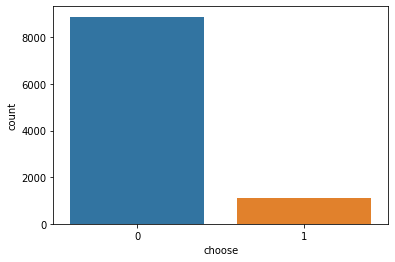

In [13]:
sns.countplot(x="choose", data=train_df)
train_df['choose'].value_counts()

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞ - —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –µ–µ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –ü–æ–∑–¥–Ω–µ–µ –¥–ª—è –º–æ–¥–µ–ª–∏ KNN –ø—Ä–æ–≤–µ–¥–µ–º –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤. –î–ª—è –º–æ–¥–µ–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –¥–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞–≤–∏–º –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π.  

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

In [15]:
df_num_features = train_df.select_dtypes(include=['int16','int8', 'float32'])

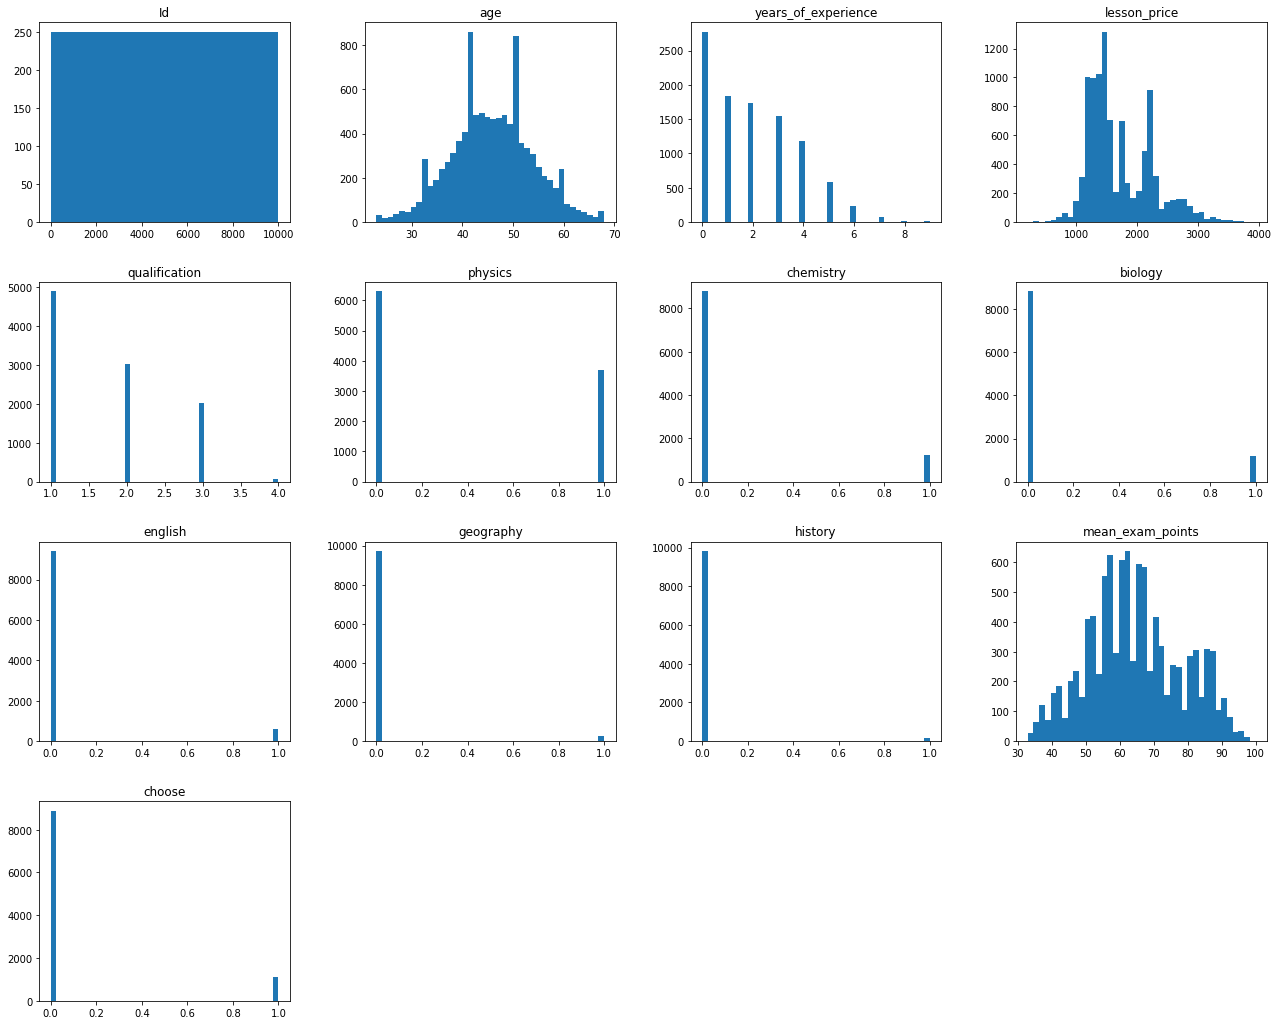

In [23]:
df_num_features.hist(figsize=(22, 18), bins=40, grid = False);

In [ ]:
–ü—Ä–∏–∑–Ω–∞–∫ lesson_price —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—ã–±—Ä–æ—Å—ã. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö –ø–æ–∑–¥–Ω–µ–µ.

In [ ]:
–ü–æ—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É:

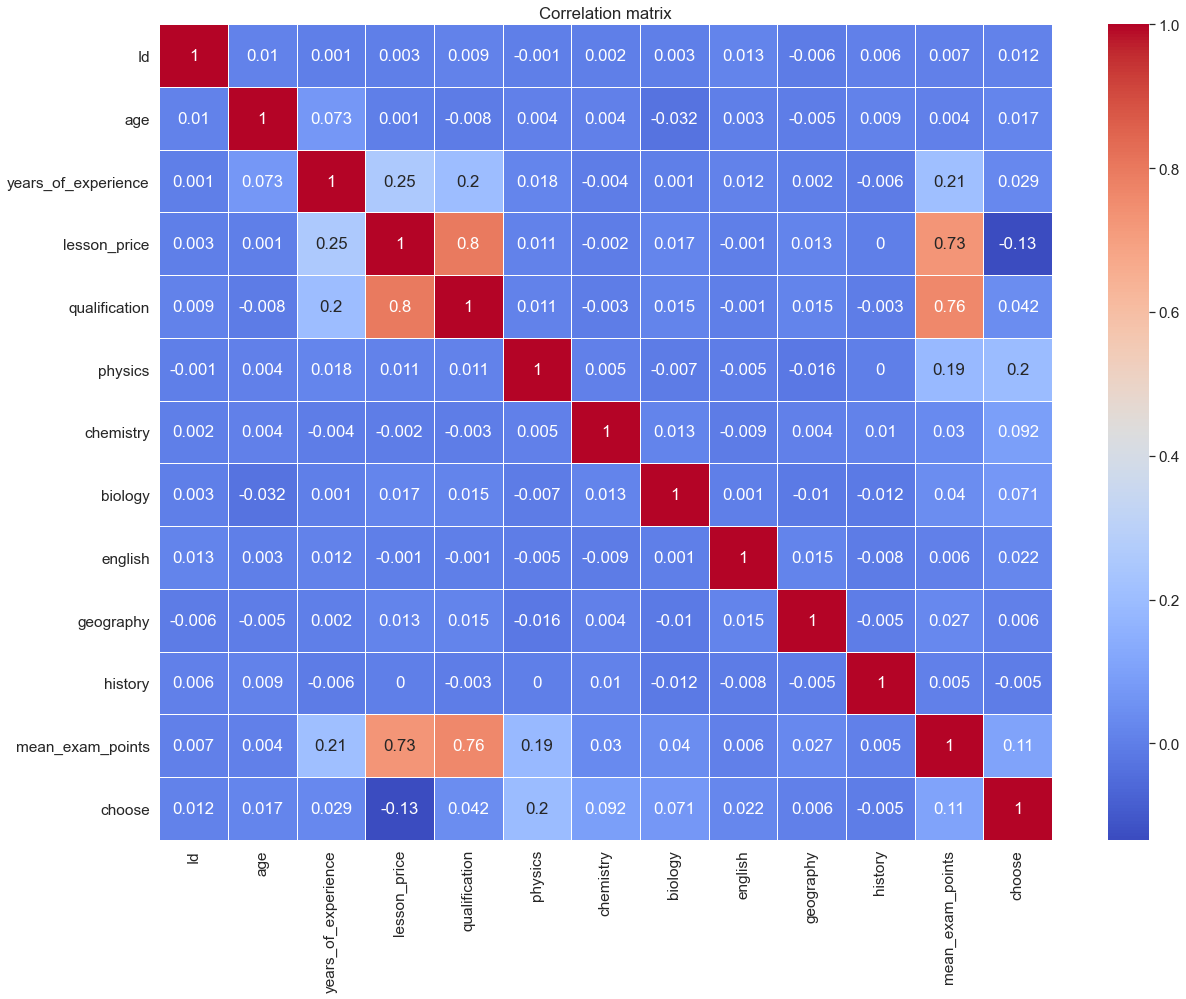

In [24]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(train_df.corr().round(3), annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
–ü—Ä–∏–∑–Ω–∞–∫ physics –∏–º–µ–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º choose.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ lesson_price:

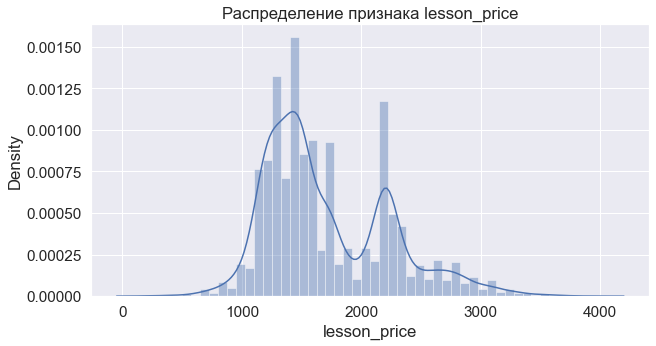

In [25]:
plt.figure(figsize = (10, 5))

sns.distplot(train_df['lesson_price'], bins=50)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ lesson_price')
plt.show()

 –ü–æ—Å–æ–º—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏:

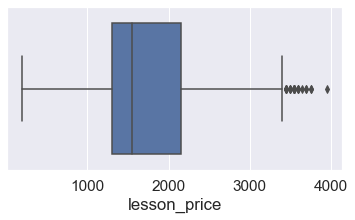

In [27]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['lesson_price'], whis=1.5)

plt.xlabel('lesson_price')
plt.show()

In [28]:
train_df['lesson_price'].value_counts()

1450.0    677
1500.0    639
1200.0    614
2200.0    547
1350.0    535
         ... 
3700.0      2
400.0       2
3950.0      1
450.0       1
3650.0      1
Name: lesson_price, Length: 71, dtype: int64

In [29]:
train_df['lesson_price'].describe()

count    10000.000000
mean      1702.439941
std        523.789062
min        200.000000
25%       1300.000000
50%       1550.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64

–ó–Ω–∞—á–µ–Ω–∏—è –±–æ–ª–µ–µ 3400 –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏, –∑–∞–º–µ–Ω–∏–º –∏—Ö –Ω–∞ –º–µ–¥–∏–∞–Ω—É.

In [30]:
train_df.loc[train_df['lesson_price'] >= 3400, 'lesson_price'] = train_df['lesson_price'].median()

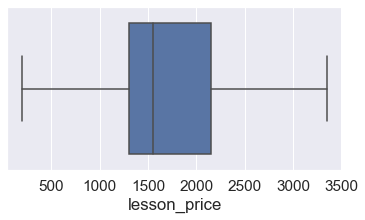

In [31]:
# –ü–æ—Å–æ–º—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['lesson_price'], whis=1.5)

plt.xlabel('lesson_price')
plt.show()

–ü–æ—Å–∫–æ–ª—å–∫—É –ø—Ä–∏–∑–Ω–∞–∫ Id –Ω–µ –Ω–µ—Å–µ—Ç –≤ —Å–µ–±–µ —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, —Ç–æ –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –Ω–µ–≥–æ:

In [32]:
train_df = train_df.drop('Id', 1)
test_df = test_df.drop('Id', 1)

–°–æ–∑–¥–∞–¥–∏–º –∏ –¥–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

–°–æ–∑–¥–∞–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫ "—Ç–æ—á–Ω—ã–µ –Ω–∞—É–∫–∏", –∫–æ—Ç–æ—Ä—ã —Å–≤—è–∑—ã–≤–∞–µ—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –±–∞–ª–ª–∞ –∑–∞ —ç–∫–∑–∞–º–µ–Ω –∏ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ —É —É—á–∏—Ç–µ–ª–µ–π, –ø—Ä–µ–ø–æ–¥–∞—é—â–∏—Ö —Ñ–∏–∑–∏–∫—É.

In [33]:
train_df['exact_sciences'] = 0
test_df['exact_sciences'] = 0

In [34]:
train_df.loc[train_df['physics'] == 1, 'exact_sciences'] = train_df['mean_exam_points'] / train_df['qualification']
test_df.loc[test_df['physics'] == 1, 'exact_sciences'] = test_df['mean_exam_points'] / test_df['qualification']

In [36]:
train_df['exact_sciences'].value_counts()

0.000000     6294
29.000000     106
30.000000     103
67.000000      90
28.000000      83
             ... 
33.333332       1
24.333334       1
48.500000       1
18.000000       1
21.333334       1
Name: exact_sciences, Length: 125, dtype: int64

–∏ –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫, —Å–≤—è–∑—ã–≤–∞—é—â–∏–π –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è —É —É—á–∏—Ç–µ–ª–µ–π, –ø—Ä–µ–ø–æ–¥–∞—é—â–∏—Ö —Ñ–∏–∑–∏–∫—É.

In [37]:
train_df['lesson_quality'] = 0
test_df['lesson_quality'] = 0

In [38]:
train_df.loc[train_df['physics'] == 1, 'lesson_quality'] = train_df['qualification'] / train_df['lesson_price']
test_df.loc[test_df['physics'] == 1, 'lesson_quality'] = test_df['qualification'] / test_df['lesson_price']

In [40]:
train_df['lesson_quality'].value_counts()

0.000000    6294
0.000833     205
0.000800     195
0.001333     187
0.000769     178
            ... 
0.002581       1
0.001860       1
0.000312       1
0.005000       1
0.001951       1
Name: lesson_quality, Length: 105, dtype: int64

In [39]:
train_df.describe()

age  years_of_experience  lesson_price  qualification  \
count  10000.000000         10000.000000  10000.000000   10000.000000   
mean      45.800900             1.974800   1696.074951       1.724300   
std        8.030274             1.766883    513.363586       0.798845   
min       23.000000             0.000000    200.000000       1.000000   
25%       40.000000             0.000000   1300.000000       1.000000   
50%       46.000000             2.000000   1550.000000       2.000000   
75%       51.000000             3.000000   2150.000000       2.000000   
max       68.000000             9.000000   3350.000000       4.000000   

           physics     chemistry       biology       english    geography  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.00000   
mean       0.37060      0.121500      0.117200      0.059100      0.02770   
std        0.48299      0.326724      0.321675      0.235824      0.16412   
min        0.00000      0.000000      0.000000      0.000000      0.00000   
25%        0.00000      0.000000      0.000000      0.000000      0.00000   
50%        0.00000      0.000000      0.000000      0.000000      0.00000   
75%        1.00000      0.000000      0.000000      0.000000      0.00000   
max        1.00000      1.000000      1.000000      1.000000      1.00000   

            history  mean_exam_points        choose  exact_sciences  \
count  10000.000000      10000.000000  10000.000000    10000.000000   
mean       0.018000         64.435204      0.110900       16.680017   
std        0.132958         13.595024      0.314024       23.642418   
min        0.000000         33.000000      0.000000        0.000000   
25%        0.000000         55.000000      0.000000        0.000000   
50%        0.000000         63.000000      0.000000        0.000000   
75%        0.000000         74.000000      0.000000       33.000000   
max        1.000000        100.000000      1.000000       93.000000   

       lesson_quality  
count    10000.000000  
mean         0.000372  
std          0.000531  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000800  
max          0.010000

In [ ]:
–ü–æ—Å–º–æ—Ç—Ä–∏–º –µ—â–µ —Ä–∞–∑ –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É:

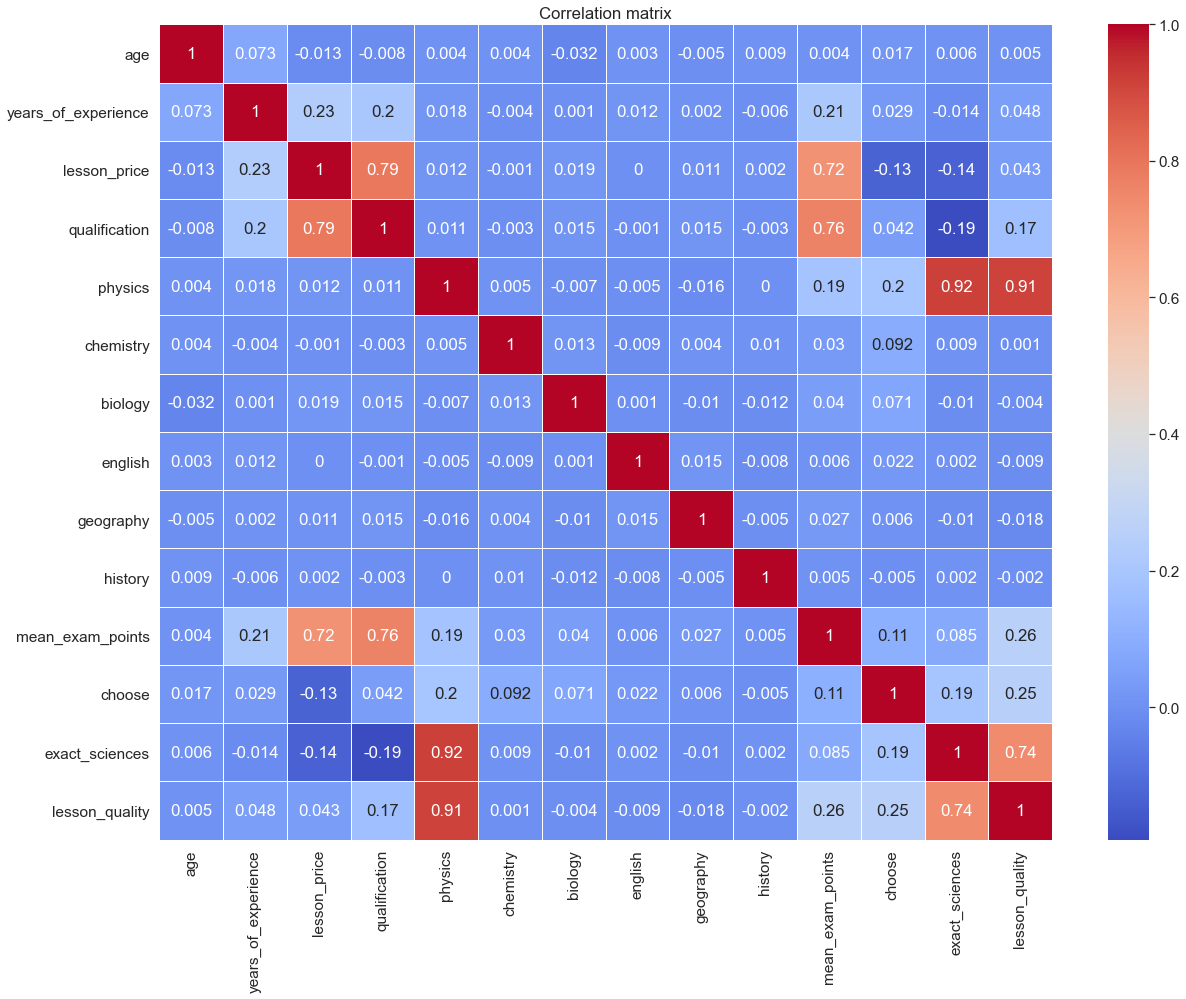

In [41]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(train_df.corr().round(3), annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤:

In [43]:
X = train_df.drop('choose', axis=1).values
y = train_df.choose.values

In [44]:
X.shape, y.shape

((10000, 13), (10000,))

In [45]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)
X_over_sampl, y_over_sampl = smt.fit_resample(X, y)

In [51]:
X_over_sampl.shape, y_over_sampl.shape 


((17782, 13), (17782,))

–ù–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å—Ç–∞–ª–æ –±–æ–ª—å—à–µ.

In [52]:
sum(y_over_sampl == 1), sum(y_over_sampl == 0)


(8891, 8891)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π —Ü–µ–ª–æ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤—ã—Ä–æ–≤–Ω—è–ª–æ—Å—å.

### –ê–ª–≥–æ—Ä–∏—Ç–º kNN

–î–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º —è–≤–ª—è–µ—Ç—Å—è –µ—â–µ –æ–¥–Ω–∏–º —Å–ø–æ—Å–æ–±–æ–º —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –†–∞—Å—à–∏—Ñ—Ä–æ–≤—ã–≤–∞–µ—Ç—Å—è –µ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–∞–∫ "k –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (k nearest neighbours)".

–°—É—Ç—å –µ–≥–æ –¥–æ–≤–æ–ª—å–Ω–æ –ø—Ä–æ—Å—Ç–∞ –∏ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –æ—Ç–Ω–µ—Å–µ–Ω–∏—è –æ–±—ä–µ–∫—Ç—É –∫ —Ç–æ–º—É –∫–ª–∞—Å—Å—É, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç —Ä—è–¥–æ–º —Å –Ω–∏–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —É–ø—Ä–æ—â–µ–Ω–Ω–æ –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

–Ω–∞–π—Ç–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç –æ–±—ä–µ–∫—Ç–∞  ùë¢  –¥–æ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –æ–±—ä–µ–∫—Ç–æ–≤  ùë•  –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏;
–≤—ã–±—Ä–∞—Ç—å  ùëò  –æ–±—ä–µ–∫—Ç–æ–≤, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –∫–æ—Ç–æ—Ä—ã—Ö –º–∏–Ω–∏–º–∞–ª—å–Ω–æ;
–æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É, –∫ –∫–æ—Ç–æ—Ä–æ–º—É –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∏–∑ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö  ùëò  –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π, —Ç–æ –µ—Å—Ç—å –ø—Ä–æ–≤–µ—Å—Ç–∏ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ.

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ–π –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é –º–µ—Ç–æ–¥–∞ —è–≤–ª—è–µ—Ç—Å—è —Ç–æ, —á—Ç–æ –Ω–∞ —ç—Ç–∞–ø–µ –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Å—Ç—Ä–æ–∏—Ç—Å—è –º–æ–¥–µ–ª—å, –∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–º–∏–Ω–∞–µ—Ç—Å—è –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞. –í—ã—á–∏—Å–ª–µ–Ω–∏—è –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è –∏–º–µ–Ω–Ω–æ –Ω–∞ —ç—Ç–∞–ø–µ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ (–ø–æ—ç—Ç–æ–º—É —ç—Ç–æ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º –º–æ–∂–Ω–æ –Ω–∞–∑–≤–∞—Ç—å –ª–µ–Ω–∏–≤—ã–º).

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampl, y_over_sampl,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    )
X_train.shape, X_test.shape

((12447, 13), (5335, 13))

In [54]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [76]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # —Ä–∞—Å—á–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –¥–æ
            # –æ–±—ä–µ–∫—Ç–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
            distance = e_metrics(x, x_train[i])
            
            # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ —Å–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∏ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –æ–±—ä–µ–∫—Ç–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
            test_distances.append((distance, y_train[i]))
        
        # —Å–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å —Å–æ –≤—Å–µ–º–∏ –≤–æ–∑–º–æ–∂–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # –°–æ—Ä—Ç–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –∏ —Å—Ä–µ–¥–∏ –ø–µ—Ä–≤—ã—Ö k —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ–¥—Å—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –ø–æ—è–≤–ª–µ–Ω–∏—è —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

#         –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ —Å–ø–∏—Å–æ–∫ –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è –∫–ª–∞—Å—Å
#         answers.append(sorted(classes, key=classes.get)[-1])
        # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ —Å–ø–∏—Å–æ–∫ –æ—Ç–≤–µ—Ç–æ–≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–ª—è 1 –∫–ª–∞—Å—Å–∞
        answers.append(classes[1] / (classes[1] + classes[0]))
        
    return answers

In [57]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç k (–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π):

In [58]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = {k}: {accuracy(y_pred, y_test):.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = 2: 0.832


In [60]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = {k}: {accuracy(y_pred, y_test):.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = 5: 0.833


In [73]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = {k}: {accuracy(y_pred, y_test):.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ k = 10: 0.799


–ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–º–ª–µ–º—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç k = 5

–í—ã–ø–æ–ª–Ω–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:

In [78]:
X_test_knn = test_df.values

In [79]:
k = 5

y_pred = knn(X_train, y_train, X_test_knn, k)

In [80]:
s_submission.choose = y_pred

In [81]:
s_submission.to_csv('submit_prediction_knn.csv', index=False)

–û—Ü–µ–Ω–∫–∞ –Ω–∞ Kaggle 0.91548

### Random forest

–°–ª—É—á–∞–π–Ω—ã–µ –ª–µ—Å–∞ –Ω–∞–∑–≤–∞–Ω—ã —Ç–∞–∫ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–µ—Ä–µ–≤—å–µ–≤, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –æ–Ω–∏ —Å–æ—Å—Ç–æ—è—Ç, –≤–Ω–µ—Å–µ–Ω —ç–ª–µ–º–µ–Ω—Ç —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –¥–µ—Ä–µ–≤—å–µ–≤. –¢–∞–∫–∞—è —Ä–∞–Ω–¥–æ–º–∏–∑–∞—Ü–∏—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –æ–±—É—á–µ–Ω–∏–∏ –±–∞–∑–æ–≤—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –ø–æ–¥–≤—ã–±–æ—Ä–∫–∞—Ö –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏. –û–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω—ã—Ö –ø–æ–¥–≤—ã–±–æ—Ä–æ–∫ - –±—É—Ç—Å—Ç—Ä–∞–ø (bootstrap). –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ø–æ–ª—É—á–µ–Ω–∏–∏ –∏–∑ –≤—ã–±–æ—Ä–∫–∏ –¥–ª–∏–Ω—ã  ùëô  –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ —Ç–æ–π –∂–µ –¥–ª–∏–Ω—ã  ùëô . –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –±—É—Ç—Å—Ç—Ä–∞–ø-–≤—ã–±–æ—Ä–∫–∏ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏  ùëô  —Ä–∞–∑ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç, –ø—Ä–∏—á–µ–º –∫–∞–∂–¥—ã–π —Ä–∞–∑ –Ω–æ–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –∏–∑ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–∏. 

–†–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞

In [61]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # —Ä–∞–∑–º–µ—Ä —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –∏—Å—Ö–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π
    bootstrap = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [62]:
def get_subsample(len_sample):
    # –±—É–¥–µ–º —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –Ω–µ —Å–∞–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ –∏—Ö –∏–Ω–¥–µ–∫—Å—ã
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [63]:
# –†–µ–∞–ª–∏–∑—É–µ–º –∫–ª–∞—Å—Å —É–∑–ª–∞

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # –∏–Ω–¥–µ–∫—Å –ø—Ä–∏–∑–Ω–∞–∫–∞, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –≤–µ–¥–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –ø–æ—Ä–æ–≥–æ–º –≤ —ç—Ç–æ–º —É–∑–ª–µ
        self.t = t  # –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞
        self.true_branch = true_branch  # –ø–æ–¥–¥–µ—Ä–µ–≤–æ, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–µ–µ —É—Å–ª–æ–≤–∏—é –≤ —É–∑–ª–µ
        self.false_branch = false_branch  # –ø–æ–¥–¥–µ—Ä–µ–≤–æ, –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–µ–µ —É—Å–ª–æ–≤–∏—é –≤ —É–∑–ª–µ

In [64]:
# –ò –∫–ª–∞—Å—Å —Ç–µ—Ä–º–∏–Ω–∞–ª—å–Ω–æ–≥–æ —É–∑–ª–∞ (–ª–∏—Å—Ç–∞)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # –ø–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
        classes = {}  # —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Å–ª–æ–≤–∞—Ä—å "–∫–ª–∞—Å—Å: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # –Ω–∞–π–¥–µ–º –∫–ª–∞—Å—Å, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–æ—Ç–æ—Ä–æ–≥–æ –±—É–¥–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –≤ —ç—Ç–æ–º –ª–∏—Å—Ç–µ –∏ –≤–µ—Ä–Ω–µ–º –µ–≥–æ    
        prediction = max(classes, key=classes.get)
        return prediction        

In [65]:
# –†–∞—Å—á–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏—è –î–∂–∏–Ω–∏

def gini(labels):
    #  –ø–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  —Ä–∞—Å—á–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏—è
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [66]:
# –†–∞—Å—á–µ—Ç –ø—Ä–∏—Ä–æ—Å—Ç–∞

def gain(left_labels, right_labels, root_gini):

    # –¥–æ–ª—è –≤—ã–±–æ—Ä–∫–∏, —É—à–µ–¥—à–∞—è –≤ –ª–µ–≤–æ–µ –ø–æ–¥–¥–µ—Ä–µ–≤–æ
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [67]:
# –†–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ —É–∑–ª–µ

def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [68]:
# –ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è

def find_best_split(data, labels):
    
    #  –æ–±–æ–∑–Ω–∞—á–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —É–∑–ª–µ
    min_leaf_samples = 5

    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    feature_subsample_indices = get_subsample(n_features) # –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    
    for index in feature_subsample_indices:
        # –±—É–¥–µ–º –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Ç–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞, –∏—Å–∫–ª—é—á–∞—è –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  –ø—Ä–æ–ø—É—Å–∫–∞–µ–º —Ä–∞–∑–±–∏–µ–Ω–∏—è, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –≤ —É–∑–ª–µ –æ—Å—Ç–∞–µ—Ç—Å—è –º–µ–Ω–µ–µ 5 –æ–±—ä–µ–∫—Ç–æ–≤
#             if len(true_data) < min_leaf_samples or len(false_data) < min_leaf_samples:
#                 continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            #  –≤—ã–±–∏—Ä–∞–µ–º –ø–æ—Ä–æ–≥, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –ø–æ–ª—É—á–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç –∫–∞—á–µ—Å—Ç–≤–∞
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [69]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Å –ø–æ–º–æ—â—å—é —Ä–µ–∫—É—Ä—Å–∏–≤–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏

def build_tree(data, labels):

    gain, t, index = find_best_split(data, labels)

    #  –ë–∞–∑–æ–≤—ã–π —Å–ª—É—á–∞–π - –ø—Ä–µ–∫—Ä–∞—â–∞–µ–º —Ä–µ–∫—É—Ä—Å–∏—é, –∫–æ–≥–¥–∞ –Ω–µ—Ç –ø—Ä–∏—Ä–æ—Å—Ç–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–∞
    if gain == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # –†–µ–∫—É—Ä—Å–∏–≤–Ω–æ —Å—Ç—Ä–æ–∏–º –¥–≤–∞ –ø–æ–¥–¥–µ—Ä–µ–≤–∞
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–ª–∞—Å—Å —É–∑–ª–∞ —Å–æ –≤—Å–µ–º–∏ –ø–æ–¥–¥–µ—Ä–µ–≤—å—è–º–∏, —Ç–æ –µ—Å—Ç—å —Ü–µ–ª–æ–≥–æ –¥–µ—Ä–µ–≤–∞
    return Node(index, t, true_branch, false_branch)

In [70]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [71]:
# –§—É–Ω–∫—Ü–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞

def classify_object(obj, node):

    #  –û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ä–µ–∫—É—Ä—Å–∏—é, –µ—Å–ª–∏ –¥–æ—Å—Ç–∏–≥–ª–∏ –ª–∏—Å—Ç–∞
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [72]:
# —Ñ—É–Ω–∫—Ü–∏—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ –≤—ã–±–æ—Ä–∫–µ –Ω–∞ –æ–¥–Ω–æ–º –¥–µ—Ä–µ–≤–µ

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [117]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ–º –¥–µ—Ä–µ–≤—å–µ–≤

def tree_vote(forest, data):

    # –¥–æ–±–∞–≤–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤—Å–µ—Ö –¥–µ—Ä–µ–≤—å–µ–≤ –≤ —Å–ø–∏—Å–æ–∫
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
#     print(predictions)

    # —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    predictions_per_object = list(zip(*predictions))
#     print(predictions_per_object)

# #     –≤—ã–±–µ—Ä–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∏—Ç–æ–≥–æ–≤–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ —Ç–æ,
# #     –∑–∞ –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–æ–≥–æ–ª–æ—Å–æ–≤–∞–ª–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤
#     voted_predictions = []
#     for obj in predictions_per_object:
#         voted_predictions.append(max(set(obj), key=obj.count))
        
    voted_predictions = []
    for obj in predictions_per_object:
        proba = dict(zip(list(obj), [list(obj).count(i) for i in list(obj)]))
        if proba.get(1) is None:
            proba[1] = 0
        if proba.get(0) is None:
            proba[0] = 0
        voted_predictions.append(proba[1] / (proba[1] + proba[0]))
        
    return voted_predictions

In [75]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [82]:
%%time
n_trees = 1
my_forest_1_imb = random_forest(X_train, y_train, n_trees)

Wall time: 33.6 s


In [83]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_1_imb, X_train)

In [84]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_1_imb, X_test)

In [85]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 1 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 87.523
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 1 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 84.424


In [86]:
%%time
n_trees = 10
my_forest_10_imb = random_forest(X_train, y_train, n_trees)

Wall time: 4min 30s


In [87]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_10_imb, X_train)

In [88]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_10_imb, X_test)

In [89]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 10 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 94.874
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 10 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 89.485


In [90]:
%%time
n_trees = 50
my_forest_50_imb = random_forest(X_train, y_train, n_trees)

Wall time: 25min 26s


In [91]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_50_imb, X_train)

In [92]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_50_imb, X_test)

In [93]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 50 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 95.726
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 50 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 90.665


–í—ã–±–µ—Ä–µ–º Random Forest –∏–∑ 50 –¥–µ—Ä–µ–≤—å–µ–≤. 

In [95]:
y_pred_trees_imb = tree_vote(my_forest_50_imb, X_test_knn)

In [96]:
s_submission_trees_imb = pd.read_csv('sample_submission.csv')

In [97]:
s_submission_trees_imb.choose = y_pred_trees_imb

In [98]:
s_submission_trees_imb.to_csv('submit_prediction_RF_imb.csv', index=False)

–û—Ü–µ–Ω–∫–∞ –Ω–∞ Kaggle 0.96009

–í—ã–ø–æ–ª–Ω–∏–º –≤—Å–µ —Ç–æ–∂–µ —Å–∞–º–æ–µ, —Ç–æ–ª—å–∫–æ –±–µ–∑ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞:

In [100]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [101]:
train_df = train_df.drop('Id', 1)
test_df = test_df.drop('Id', 1)

In [102]:
X = train_df.drop('choose', axis=1).values
y = train_df.choose.values

In [125]:
X_test_r = test_df.values

In [104]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    )
X_train.shape, X_test.shape

((12447, 13), (5335, 13))

In [105]:
%%time
n_trees = 1
my_forest_1 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 680 ms


In [106]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_1, X_train_rf)

In [107]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_1, X_test_rf)

In [108]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 1 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 90.757
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 1 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 86.467


In [109]:
%%time
n_trees = 10
my_forest_10 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 10.3 s


In [110]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_10, X_train_rf)

In [111]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_10, X_test_rf)

In [112]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 10 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 93.900
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 10 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 89.500


In [113]:
%%time
n_trees = 50
my_forest_50 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 50.7 s


In [114]:
# –ü–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ 
train_answers = tree_vote(my_forest_50, X_train_rf)

In [115]:
# –ò –ø–æ–ª—É—á–∏–º –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_answers = tree_vote(my_forest_50, X_test_rf)

In [116]:
# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_accuracy:.3f}')

# –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ {n_trees} –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.3f}')

–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 50 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 94.443
–¢–æ—á–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏–∑ 50 –¥–µ—Ä–µ–≤—å–µ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 89.600


In [135]:
y_pred_trees_ = tree_vote(my_forest_50, X_test_r)

In [136]:
s_submission_tr_rf = pd.read_csv('sample_submission.csv')

In [137]:
s_submission_tr_rf.choose = y_pred_trees_

In [138]:
s_submission_trees_rf.to_csv('submit_prediction_RF_rf.csv', index=False)

–û—Ü–µ–Ω–∫–∞ –Ω–∞ Kaggle 0.97539